[View in Colaboratory](https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/fitting_animation.ipynb)

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
!apt-get -qq install -qq ffmpeg -qq

![alt text](http://www.softschools.com/formulas/images/trajectory_formula_1.png)

![alt text](http://www.softschools.com/formulas/images/trajectory_formula_2.png)

In [0]:
def traj(x, velocity, angle, g=9.8):
  angle = np.deg2rad(angle)
  lhs = x * np.tan(angle)
  rhs_top = g * x ** 2
  rhs_bottom = (2*(velocity)**2) * (np.cos(angle)**2)
  return lhs - (rhs_top / rhs_bottom)

In [0]:
def traj_rad(x, v, angle, g=9.8):
#   angle = np.deg2rad(angle)
  lhs = x * np.tan(angle)
  rhs_top = g * x ** 2
  rhs_bottom = (2*(v)**2) * (np.cos(angle)**2)
  return lhs - (rhs_top / rhs_bottom)

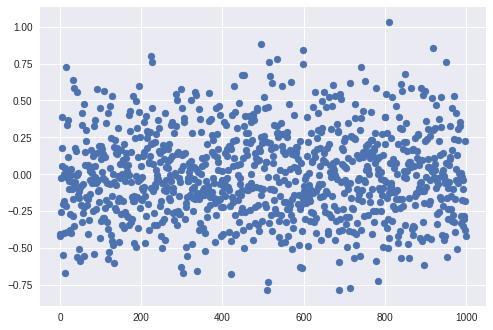

In [5]:
plt.scatter(np.arange(1000), np.random.normal(0, 0.3, 1000))

In [0]:
def clip_traj(traj_data):
  traj_data_clipped = np.clip(traj_data, a_min=0, a_max=None)
  first_zero = len(traj_data) - 1
  for i, val in enumerate(traj_data_clipped[::-1]):
    if val:
      print(i)
      first_zero = i
      break
  return traj_data[:-first_zero]

In [0]:
def gen_fake_traj(angle=45, velocity=7, n=20, noise=0.01):
  data = traj(np.arange(n), velocity=velocity, angle=angle, g=9.8)
  noisy_data = data + np.random.normal(0, noise, n)

  # if the last of half of teh data dips below zero  
  if (noisy_data[int(n/2):] < 0).any():
    noisy_data = clip_traj(noisy_data)
  return noisy_data

testing trag outputs : https://www.desmos.com/calculator/gjnco6mzjo

In [8]:
max(gen_fake_traj(angle=15, velocity=70, n=2000))

1749


16.76097679870005

In [9]:
(fake_data[10:] < 0).any()

NameError: ignored

1994


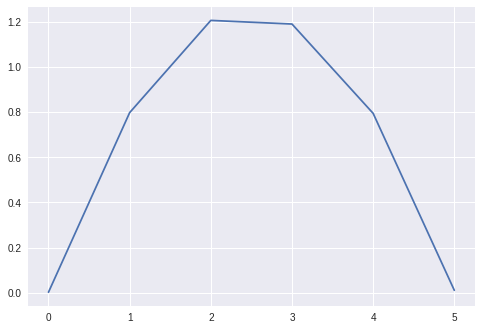

In [10]:
fake_data = gen_fake_traj(angle=45, velocity=7, n=2000)
plt.plot(fake_data)
# plt.axes().set_aspect('equal')



(0, 10)

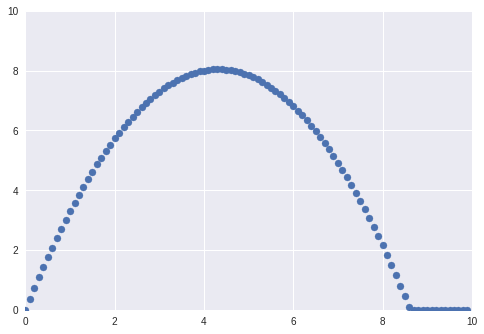

In [11]:
plt.scatter(np.arange(100)/10,np.clip(traj(np.arange(100)/10, 13, 75, g=9.8),a_min=0, a_max=None))
plt.xlim(0, 10)
plt.ylim(0, 10)

# Use tensorflow to find angle

In [0]:
import tensorflow as tf

In [0]:
def deg2rad(deg):
    pi_on_180 = 0.017453292519943295
    return deg * pi_on_180

In [86]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

angle_constant = tf.Variable(40.0, name='angle_constant')
force_constant = tf.Variable(50.0, name='force_constant')
gravity_constant = tf.constant(9.8, name='gravity_constant')

tf_lhs = x * tf.tan(deg2rad(angle_constant))
tf_rhs_top = gravity_constant * x ** 2
tf_rhs_bottom = (2*(force_constant)**2) * (tf.cos( deg2rad(angle_constant))**2)
output = tf_lhs - (tf_rhs_top / tf_rhs_bottom)
output

<tf.Tensor 'sub:0' shape=(?, 1) dtype=float32>

In [87]:
loss = tf.losses.mean_squared_error(y, output) 
loss

<tf.Tensor 'mean_squared_error/value:0' shape=() dtype=float32>

In [0]:
optimiser = tf.train.AdamOptimizer(learning_rate=5)
optimiser_op = optimiser.minimize(loss)

In [18]:
!wget https://github.com/ZackAkil/optimising-basketball/raw/master/my_shot.npy


Redirecting output to ‘wget-log.1’.


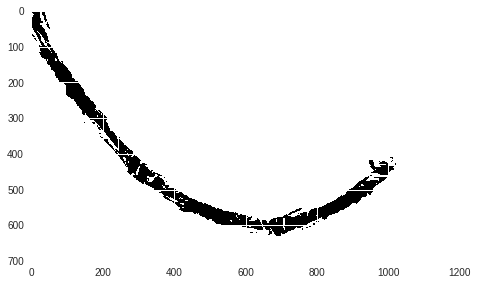

In [19]:
shot_data = np.load('my_shot.npy')[::-1, ::-1]
plt.imshow(shot_data)

In [0]:
x_input = []
y_output = []
it = np.nditer(shot_data, flags=['multi_index'])
while not it.finished:
#     print("%d <%s>" % (it[0], it.multi_index), end=' ')
    if it[0]:
      y_t, x_t  =  it.multi_index
      x_input.append(x_t), y_output.append(y_t)
    it.iternext()

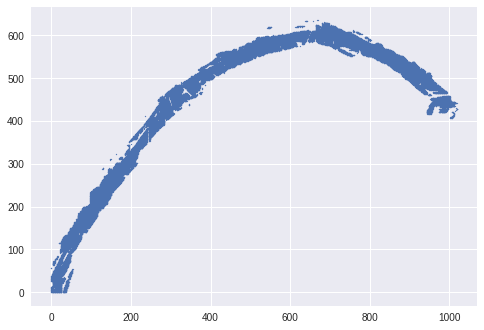

In [79]:
plt.scatter(x_input, y_output, s=1)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [83]:
np.array(y_output).reshape(-1, 1).shape, np.array(x_input).reshape(-1, 1).shape

((45349, 1), (45349, 1))

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [92]:
for i in range(10):
  _, c = sess.run([optimiser_op, loss],feed_dict={x : np.array(x_input).reshape(-1, 1), 
                                                  y: np.array(y_output).reshape(-1, 1)})
  
  if (i % 1 == 0):
    print(c)

1899722.6
1115688.9
773121.1
603263.7
508517.9
449824.78
409811.34
380017.8
356022.0
335393.2


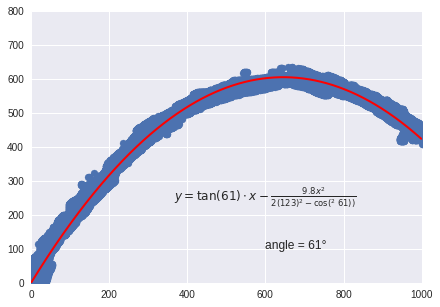

In [126]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())



fig, ax = plt.subplots(figsize=(7, 5))
plt.figure(dpi=150)


ax.set(xlim=(0, 1000), ylim=(0, 800))
scat = ax.scatter(x_input, y_output)
line = ax.plot(range(1000), [0]*1000, color='r', lw=2)[0]

def traf_equ(theta, v):
  return r'$y=\tan('+ str(theta) +r')\cdot x - \frac{9.8x^{2}}{2('+str(v)+r')^{2}-\cos(^{2}\ '+str(theta) +r' ))}$'


                                                                                     
label = ax.text(600, 250, traf_equ(0, 0),
                ha='center', va='center',
                fontsize=12)

label2 = ax.text(600, 100, 'angle = 0',
                fontsize=12)
 
def animate(i):
  
    _, c = sess.run([optimiser_op, loss],
                    feed_dict={x : np.array(x_input).reshape(-1, 1), y: np.array(y_output).reshape(-1, 1)})
    
    a,f = sess.run([angle_constant.value(), force_constant.value()])
    
    traj_path = traj(np.arange(1000), f, a, 9.8)
    
    label.set_text(traf_equ(int(a), int(f)))
    
    label2.set_text('angle = {}°'.format(int(a)))
  
  
    line.set_ydata(traj_path)
    
anim = FuncAnimation(
    fig, animate, interval=50, frames=130)

HTML(anim.to_html5_video())


In [130]:
sess.run(angle_constant.value())

61.92403

In [69]:
HTML(anim.to_html5_video())

In [31]:
a,f = sess.run([angle_constant.value(), force_constant.value()])
a,f

(17.354362, 86.125946)